In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as st
import seaborn as sns
import pyarrow
import statsmodels.api as sm

In [2]:
df_2 = pd.read_parquet("citizen_model_2.5.parquet")
accuracy_2 = []
df_3 = pd.read_parquet("citizen_model_3.0.parquet")
accuracy_3 = []
df_4 = pd.read_parquet("citizen_model_4.0.parquet")
accuracy_4 = []
df_5 = pd.read_parquet("citizen_model_5.0.parquet")
accuracy_5 = []
df_6 = pd.read_parquet("citizen_model_6.0.parquet")
accuracy_6 = []
df_16 = pd.read_parquet("citizen_model_16.0.parquet")
accuracy_16 = []

In [3]:
for df,accuracy_list in zip([df_2,df_3,df_4,df_5,df_6,df_16],[accuracy_2,accuracy_3,accuracy_4,accuracy_5,accuracy_6,accuracy_16]):
    for i in range(500):
        true = 0
        for idx,(answer,model) in enumerate(zip(df["answer"],df[f"model_answer_{i}"])):
            if answer.lower() == model.lower():
                true += 1
        accuracy_list.append(true/len(df))

## Boxplots

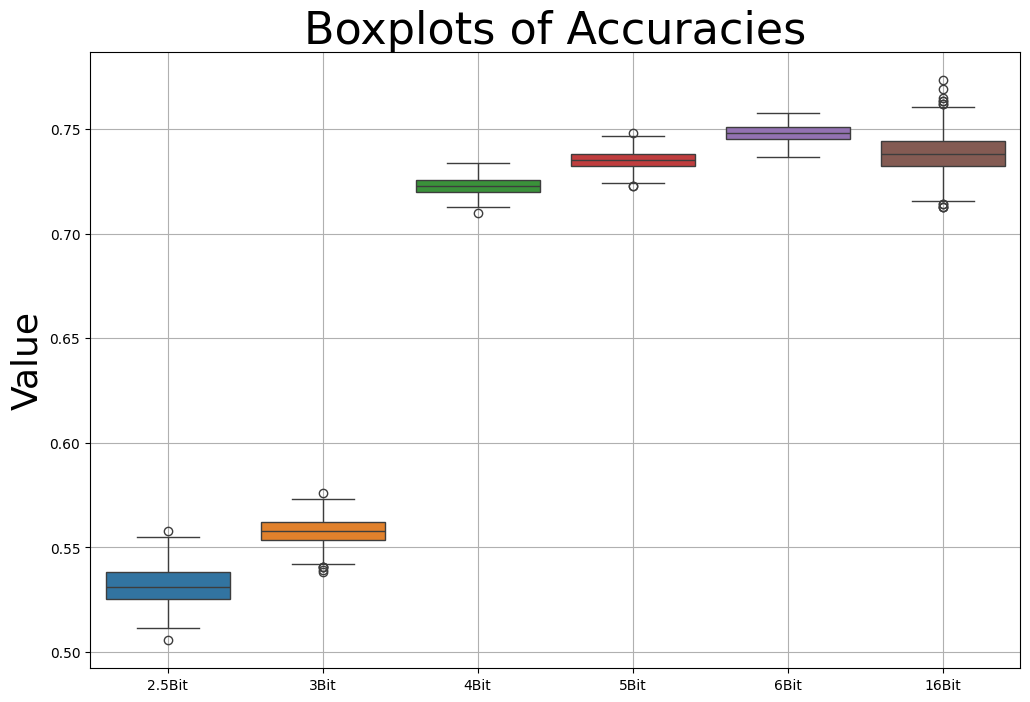

In [4]:
accuracies = [accuracy_2,accuracy_3,accuracy_4,accuracy_5,accuracy_6,accuracy_16]
plt.figure(figsize=(12, 8))
sns.boxplot(data=accuracies)
plt.title('Boxplots of Accuracies',fontsize=32)
plt.ylabel('Value',fontsize=26)
plt.xticks(range(len(accuracies)), ('2.5Bit','3Bit','4Bit','5Bit','6Bit','16Bit'))
plt.grid(True)
plt.show()

In [5]:
#BitsLabels = ['2Bit','3Bit','4Bit','5Bit','6Bit','16Bit']
#f = 0
#for bit in accuracies:
#    plt.figure(figsize=(12, 8))
#    sns.boxplot(data=bit)
#    plt.title(f'Boxplots of {BitsLabels[f]}')
#    plt.ylabel('Value')
#    plt.grid(True)
#    plt.show()
#    f+=1

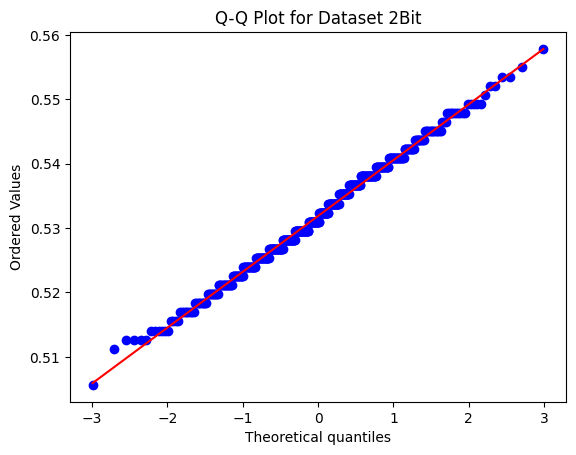

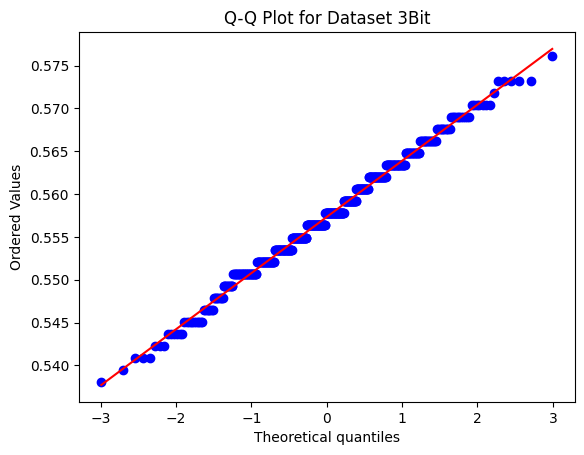

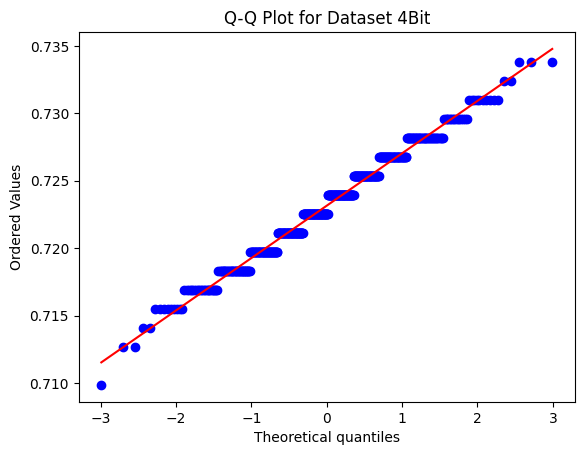

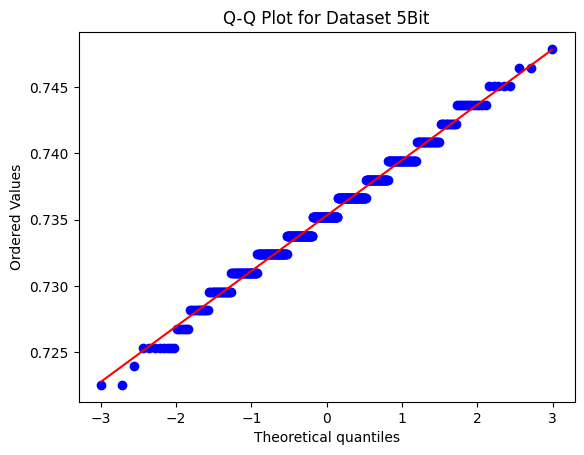

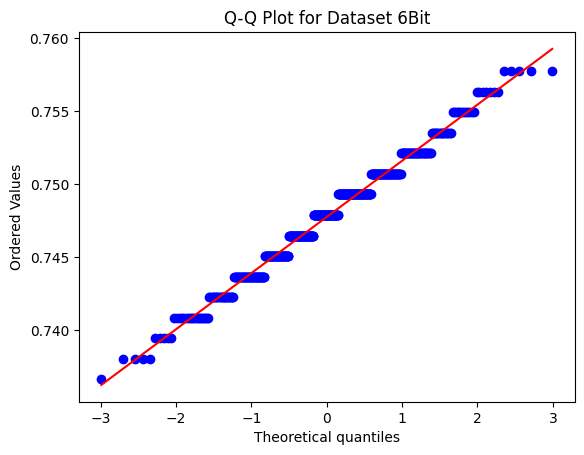

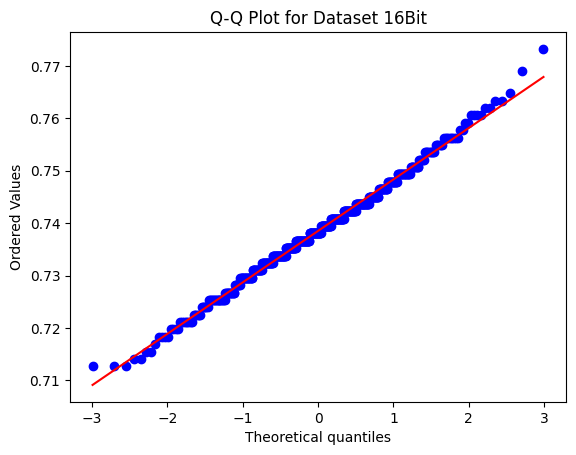

In [18]:
BitsLabels = ['2Bit','3Bit','4Bit','5Bit','6Bit','16Bit']
f = 0

for data in accuracies:
    plt.figure()
    st.probplot(data, dist = 'norm', plot=sns.mpl.pyplot)
    plt.title(f"Q-Q Plot for Dataset {BitsLabels[f]}")
    plt.show()
    f+=1
    

In [7]:
df_3

,question,option_a,option_b,option_c,answer,test_type,year,version,question_id,model_answer_0,...,model_answer_490,model_answer_491,model_answer_492,model_answer_493,model_answer_494,model_answer_495,model_answer_496,model_answer_497,model_answer_498,model_answer_499
10,Hvorfor kaldes folketingsvalget i 1973 for jor...,Fordi der blev valgt flere kvinder end mænd ti...,"Fordi der var mange vælgere, der stemt e på n...",Fordi Socialdemokratiet opnåede absolut flertal,B,indfødsretsprøven,2020,summer,11,A,...,A,A,A,A,A,A,A,A,A,A
11,Hvem kan være medlem af et udval g i Folketing...,"Politikere, der er medlemmer af Folketinget","Embedsmænd, der er ansat i et ministerium",None,A,indfødsretsprøven,2020,summer,12,A,...,A,A,A,A,A,A,A,A,A,A
12,Hvilken dansk forfatter fik i 1944 Nobelprisen...,Klaus Rifbjerg,Steen Steensen Blicher,Johannes V. Jensen,C,indfødsretsprøven,2020,summer,13,C,...,C,C,C,C,C,C,C,C,C,C
13,Hvilken dansk videnskabsmand er kendt for opda...,Niels Bohr,Ole Rømer,H.C. Ørsted,C,indfødsretsprøven,2020,summer,14,A,...,A,A,A,A,A,A,A,A,A,A
14,Hvilket parti var Poul Nyrup Rasmussen formand...,Venstre,Socialdemokratiet,Det Konservative Folkeparti,B,indfødsretsprøven,2020,summer,15,B,...,B,B,B,B,B,B,B,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Hvor blev danske FN-soldater udsendt til i 199...,Libyen,Afghanistan,Bosnien,C,medborgerskabsprøven,2023,winter,21,B,...,B,B,B,B,B,B,B,B,B,B
716,Hvor mange regioner er der i Danmark?,5,15,25,A,medborgerskabsprøven,2023,winter,22,B,...,B,B,B,,B,B,B,B,B,B
717,"Skal politiet normalt give tilladelse til, at ...",Ja,Nej,None,B,medborgerskabsprøven,2023,winter,23,B,...,B,B,B,B,B,B,B,B,B,B
718,Hvad var Yahya Hassan særligt kendt for?,Han var skuespiller,Han var fodboldspiller,Han var digter,C,medborgerskabsprøven,2023,winter,24,A,...,A,B,A,A,A,A,A,A,A,A


In [8]:
data = [accuracy_3,accuracy_5,accuracy_6]

import scipy.stats as stats

# Ideer til næste gang ROC (Split eller Microaveraging)
# Confusion Matrix (evt. Heatmapping)


def calculate_confidence_interval(data, confidence=0.95):
    # Calculate the mean of the data
    mean = np.mean(data)
    
    # Calculate the standard error of the mean
    sem = stats.sem(data)
    
    # Calculate the confidence interval
    confidence_interval = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    
    # Return the lower and upper interval
    return mean - confidence_interval, mean + confidence_interval

calculate_confidence_interval(accuracy_6)

(0.7474156494280239, 0.7480942097269055)

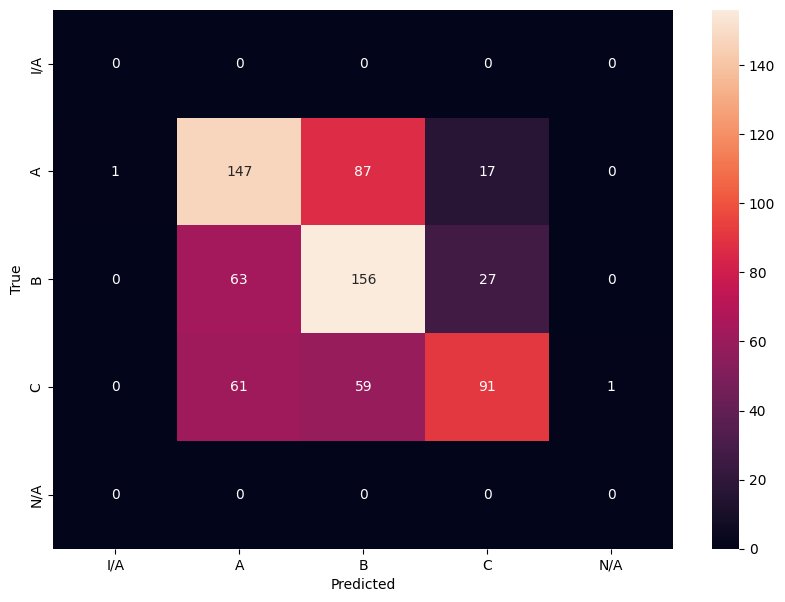

In [9]:
from sklearn.metrics import confusion_matrix
y_true = df_3['answer'].tolist()
y_pred = df_3['model_answer_0'].tolist()
#y_pred = ['A' if x == 'A' else 'B' if x == 'B' else 'C' if x == 'C' else 'E' for x in y_pred]
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
class_labels = ['I/A','A','B','C','N/A']
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Speedtest Stuff

In [10]:
df_speedtest = pd.read_parquet('speed.parquet')
speedlabels = ['speed_2.5bpw','speed_3.0bpw','speed_4.0bpw','speed_5.0bpw','speed_6.0bpw','speed_16.0bpw']
df_tokens = df_speedtest.drop(speedlabels,axis=1)
df_speed = df_speedtest.filter(speedlabels,axis=1)
df_speedtest

,speed_2.5bpw,speed_3.0bpw,speed_4.0bpw,speed_5.0bpw,speed_6.0bpw,tokens_2.5bpw,tokens_3.0bpw,tokens_4.0bpw,tokens_5.0bpw,tokens_6.0bpw,speed_16.0bpw,tokens_16.0bpw
0,155.736357,139.618477,130.980491,123.438591,108.589690,2005,2005,2005,2005,2005,29.027152,2004
1,155.982668,148.016430,130.221505,125.897020,113.958959,2005,2005,2005,2005,2005,31.831405,2004
2,154.833723,148.089110,79.998893,123.319821,116.749685,2005,2005,2005,2005,2005,31.911008,2004
3,156.729189,149.634045,129.010815,123.722713,115.252785,2005,2005,2005,2005,2005,32.035223,2004
4,156.463820,148.594336,133.708666,105.990019,115.601371,2005,2005,2005,2005,2005,32.255490,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
95,157.012522,147.538592,134.038878,127.366049,117.171011,2005,2005,2005,2005,2005,32.528004,2004
96,157.293095,150.626655,134.062050,126.271074,116.804109,2005,2005,2005,2005,2005,32.463035,2004
97,157.115888,150.995650,132.941567,127.795408,115.796069,2005,2005,2005,2005,2005,32.550768,2004
98,156.513024,88.752538,132.487621,127.909054,117.939861,2005,2005,2005,2005,2005,32.482356,2004


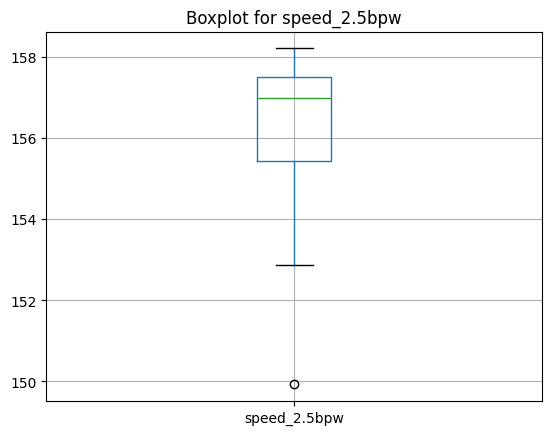

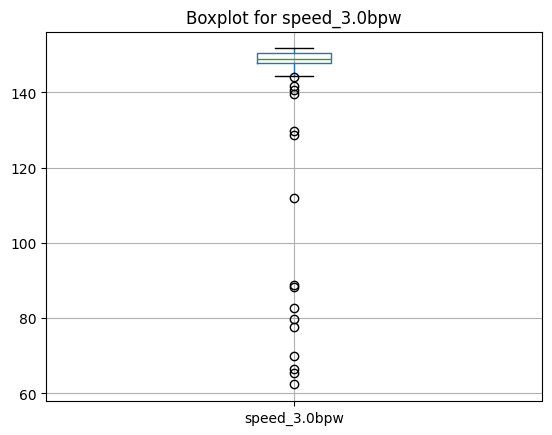

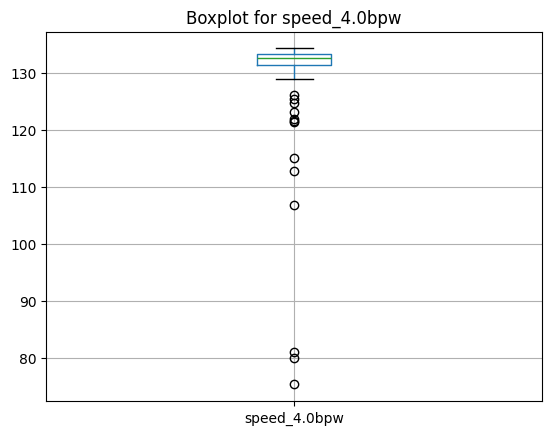

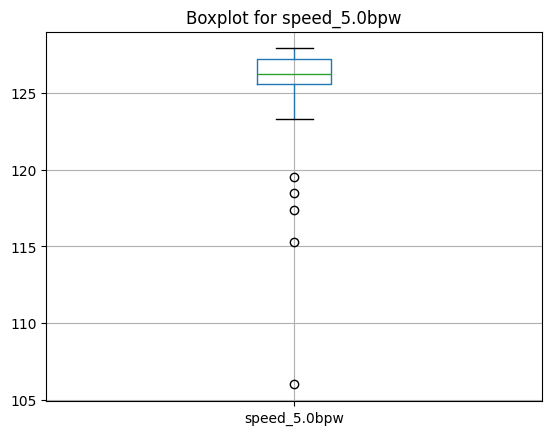

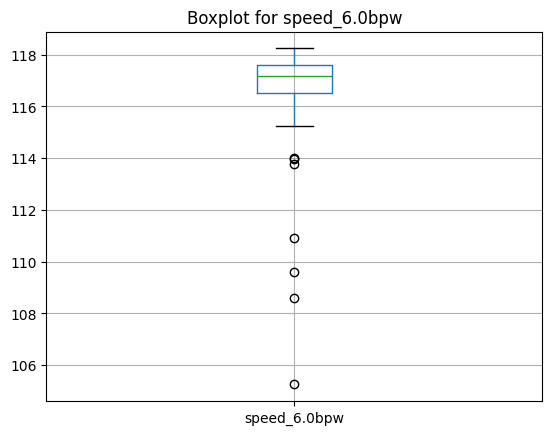

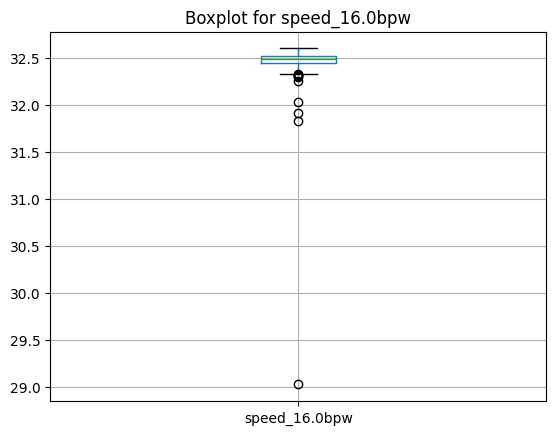

In [11]:
for data in df_speed:
    plt.figure()
    df_speed.boxplot([data])
    plt.title(f"Boxplot for {data}")

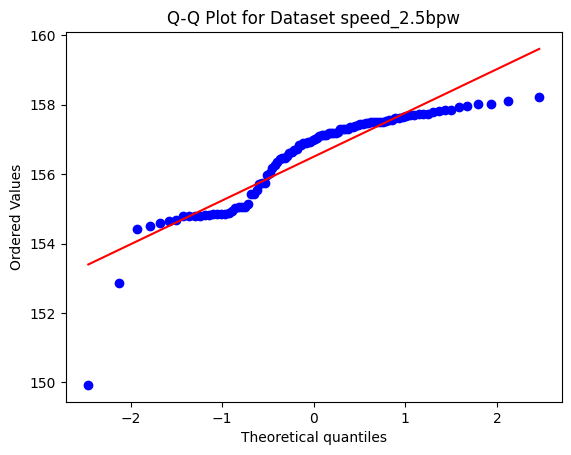

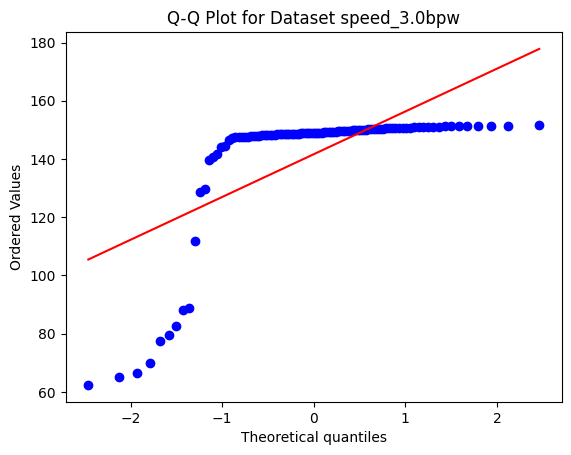

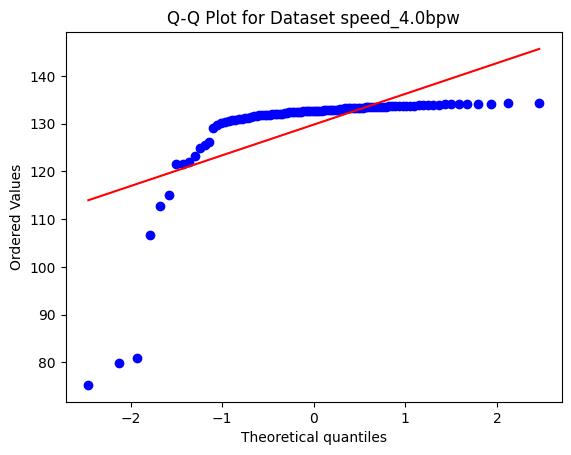

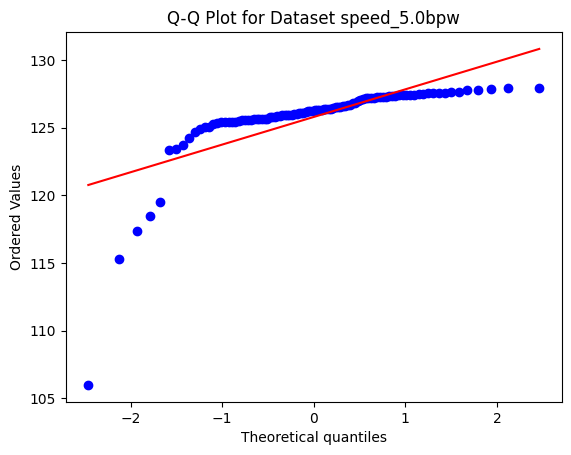

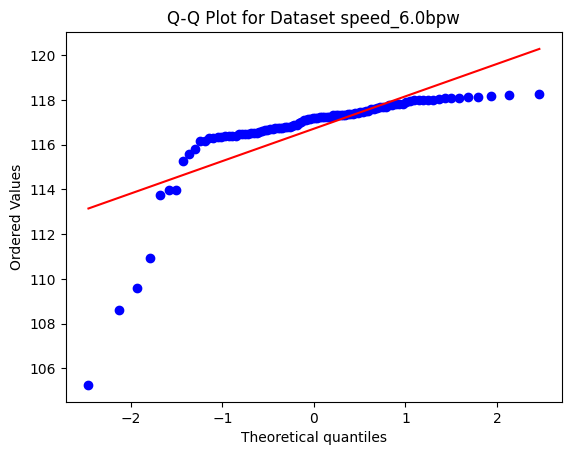

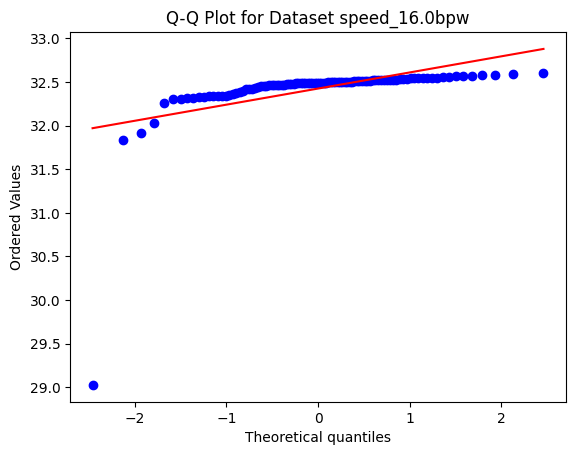

In [12]:
BitsLabels = ['2Bit','3Bit','4Bit','5Bit','6Bit','16Bit']
f = 0
for data in df_speed:
    plt.figure()
    st.probplot(df_speed[data], dist = 'norm', plot=sns.mpl.pyplot)
    plt.title(f"Q-Q Plot for Dataset {data}")
    plt.show()
    f+1
#for data in df_speed:
#    q1 = df_speed[data].quantile(0.25)
#    q3 = df_speed[data].quantile(0.75)
#    iqr = q3 - q1
#    fence_low = q1 - 1.5 * iqr
#    fence_high = q3 + 1.5 * iqr
#    cleaned_data = df_speed.loc[(df_speed[data] > fence_low) & (df_speed[data] < fence_high)]

#for data in cleaned_data:
#    plt.figure()
#    st.probplot(cleaned_data[data], dist = 'norm', plot=sns.mpl.pyplot)
#    plt.title(f"Q-Q Plot for Dataset {data}")
#    plt.show()
#    f+1

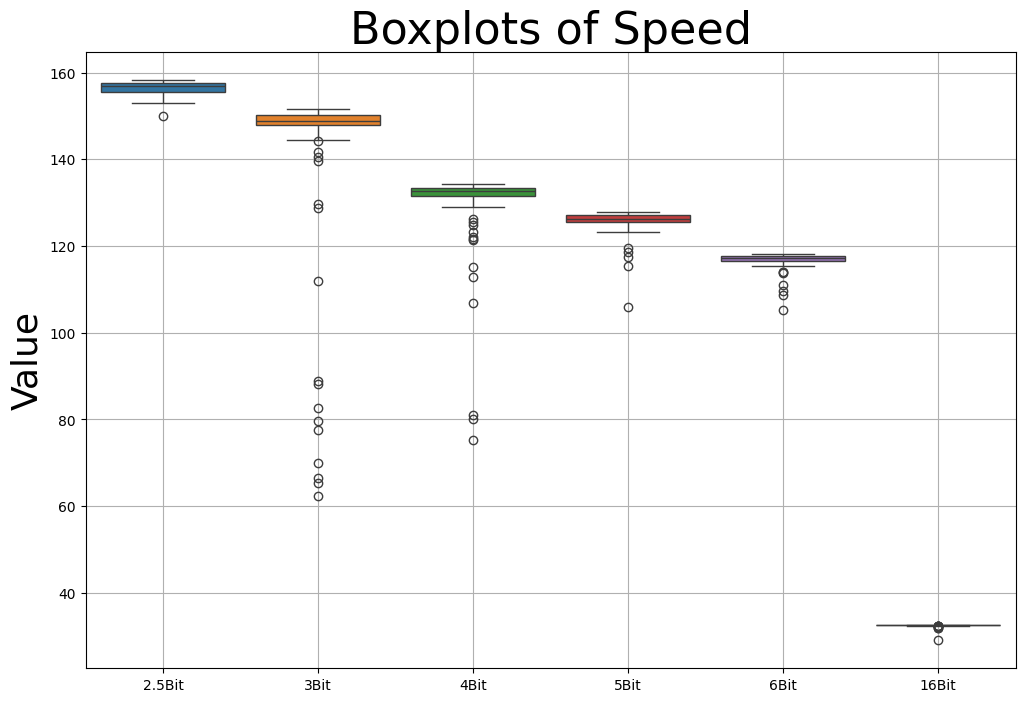

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_speed)
plt.title('Boxplots of Speed',fontsize=32)
plt.ylabel('Value',fontsize=26)
plt.xticks(range(len(accuracies)), ('2.5Bit','3Bit','4Bit','5Bit','6Bit','16Bit'))
plt.grid(True)
plt.show()

In [14]:
df_speed

,speed_2.5bpw,speed_3.0bpw,speed_4.0bpw,speed_5.0bpw,speed_6.0bpw,speed_16.0bpw
0,155.736357,139.618477,130.980491,123.438591,108.589690,29.027152
1,155.982668,148.016430,130.221505,125.897020,113.958959,31.831405
2,154.833723,148.089110,79.998893,123.319821,116.749685,31.911008
3,156.729189,149.634045,129.010815,123.722713,115.252785,32.035223
4,156.463820,148.594336,133.708666,105.990019,115.601371,32.255490
...,...,...,...,...,...,...
95,157.012522,147.538592,134.038878,127.366049,117.171011,32.528004
96,157.293095,150.626655,134.062050,126.271074,116.804109,32.463035
97,157.115888,150.995650,132.941567,127.795408,115.796069,32.550768
98,156.513024,88.752538,132.487621,127.909054,117.939861,32.482356
